## ch05. 회귀

### 05.1. 회귀 소개
회귀분석은 평균값으로 돌아가고자 하는 성질을 의미, 머신러닝 회귀예측의 핵십은 최적의 파라마터값을 찾는 것. <br>
선형회귀는 실제값과 예측값의 차이를 최소화 하는 직선형 회귀선을 최적화하는 방법이다. <br>

- 일반회귀 : RSS를 사용
- 릿지 : L2규제, 상대적으로 큰 회귀 계수 값의 영향도를 감소하기 위해 회귀 계수값을 작게 만드는 경우
- 라쏘 : L1규제, 예측영향력이 작은 피처의 계수를 0으로 하여 선택되지 않도록 하는것
- 엘라스틱 : 릿지+라쏘
- 로지스티 회귀

### 05.2. 단순선형회귀를 통한 회귀 이해
비용함수의 RSS를 가진다. 

### 05.3. 비용의 최소화 - 경사하강법

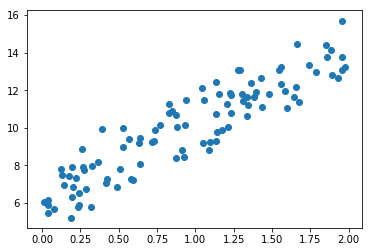

In [3]:
#회귀 예측할 데이터셋
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#산점도
plt.scatter(X,y)

In [17]:
#derivitive term 계산
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [18]:
#입력인자 iters로 주어진 횟수만큼 반복하고 w1,w0을 업데이트 적용함
#gradient descent 식에 적용(위의 update식 포함 )
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [19]:
#RSS를 계산하는 cost함수를 생성하고, 경사하강법의 결과를 확인
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [20]:
#결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


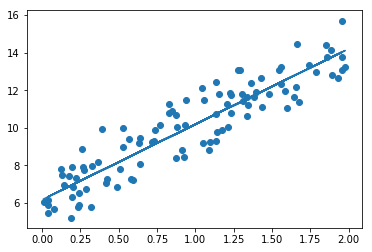

In [21]:
#구한 회귀계수를 적용
plt.scatter(X,y)
plt.plot(X,y_pred) #예측선

대규모의 데이터에 대해서는 경사하강법이 속도가 느리므로, 실전에서는 **확률적경사하강법**을 사용한다. 확률적경사하강법, 미니배치 확률적 경사하강법을 사용한다. 
이전의 gradient_descent_steps()와 비슷하되, X,y에서 batch_size를 추출하는 경우가 다르다

In [24]:
#미니배치 확률적 경사하강법
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [25]:
#계수, cost결과확인
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print("final cost:",get_cost(y, y_pred) )

w1: 4.028 w0: 6.156
final cost: 0.9937111256675345


### 5.4. sklearn LinearRegression을 이용한 보스턴 주택가격 예측
LinearRegrssion()객체는 OLS 추정방식을 기반으로 한다. (RSS는 오차제곱 자체를 나타내는 말이고 **OLS**는 실제로 RSS를 최소화하는 계수를 구하고자 하는 방식이다. normalization 방법도 여기서 나온 것이라 본다) <br>
회귀 평가의 지표로는 MAE, MSE, RMSE, $R^2$가 있다. 

In [26]:
#보스턴 주택가격 예측을 위한 데이터는 sklearn 내장이다. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

데이터셋로드 및 데이터 확인 

In [34]:
#데이터셋 로드
boston=load_boston()

#boston데이터셋 df변환
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

#boston의 target값은 가격임. 이를 price칼럼으로 df에 추가한다. 
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


target값에 각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지를 시각화 

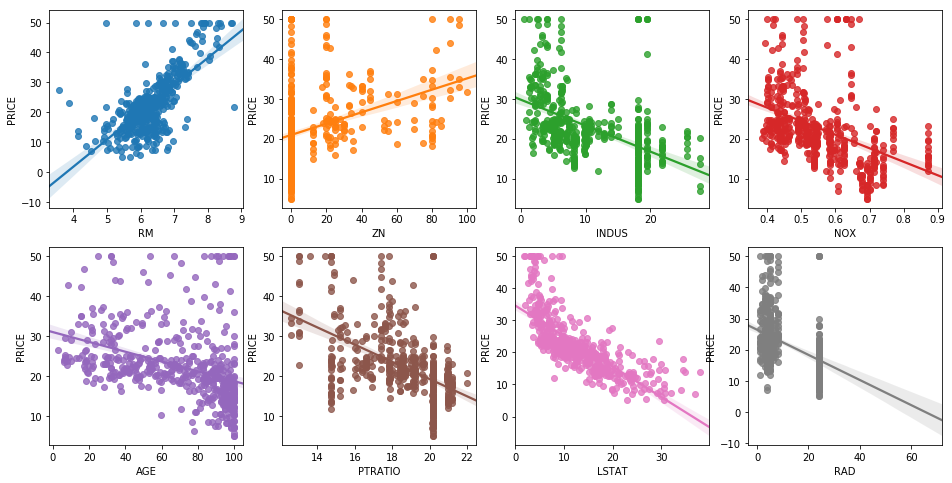

In [36]:
#2개의 행과 4개의 열을 ㅏ진 subplot을 사용, axs는 4x2의 ax를 가진다. 
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
    
#RM은 양방향의 선형성이 가장 높게 나타고 LSTAT는 음방향의 선형성이 가장 높게 나타난다. 

회귀모델을 생성하여 회귀모델을 적용 및 평가

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [40]:
#선형회귀 객체의 OLS를 바탕으로 예측, 평가의 수행
lr=LinearRegression()
lr.fit(X_train, y_train) #학습
y_preds=lr.predict(X_test) #예측(회귀식에서의 y값)

mse=mean_squared_error(y_test, y_preds) #MSE성능지표
rmse=np.sqrt(mse) #RMSE성능지표
print("mse:", mse, "rmse:",rmse, "variance score:", r2_score(y_test, y_preds))

mse: 17.296915907902164 rmse: 4.158956107955717 variance score: 0.7572263323138919


In [41]:
#회귀 계수의 절편값, 회귀계수값 확인 
print('절편값 : ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_,1))

절편값 :  40.99559517216454
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [43]:
#feature명고 회귀계수 값을 mapping하고 높은 순으로 출력한다. 
coeff=pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [44]:
# 5개의 폴드셋에서 cross_val_score()을 이용해 교차검증으로 MSE, RMSE를 측정한다. 
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


### 5.5. 다항회귀와 과적합/과소적합
데이터에 모델을 더 잘 fit하게 하기 위해서는 다항회귀를 사용한다. 다항회귀는 독립변수가 단항식이 아닌 2차, 3차방정식과 같은 다항식으로 표현되는 회귀를 말한다. 여기서 주의할 점은 다항회귀는 선형회귀라는 점이다. 선형과 비선형의 구분기준은 회귀계수이지, 독립변수가 아니라는 것이다. <br>
sklearn에 내장된 PolynomialFeatures()를 통해 피처를 다항식으로 표현이 가능하다. 

In [52]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [53]:
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


In [54]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


In [57]:
#feature변환과 선형회귀 적용을 각각 별도로 하는 것보다 sklearn의 pipeline객체를 사용하여 한번에 다항회귀를 작성하는 것이 편리
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y=1+2*X+X**2+X**3
    return y

#pipeline객체로 간소하게 다항식 feature변환과 선형 회귀의 연결
model=Pipeline([ ('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)
print('polynomial회귀계수 \n', np.round(model.named_steps['linear'].coef_,2)) #각 step으르 모두 pipeline에 의해 순차적으로 출력 

polynomial회귀계수 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


#### 다항회귀를 이용한 과소적합, 과적합의 이해
다항회귀는 피처의 직선적 관계가 아닌 복잡한 다항관계의 모델링이 가능합니다 다항식의 차수가 높아질수록 매우 복잡한 형태의 피처관계까지 모델링이 가능합니다. 하지만 다항회귀의 차수를 높을수록 학습데이터에만 맞춘 학습이 이루어지기 때문에 과적합이 발생한다. 

In [58]:
#노이즈값을 가지는 데이터의 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417300e+06  2.03717520e+07
 -1.44874234e+08  7.09320168e+08 -2.47067524e+09  6.24565587e+09
 -1.15677381e+10  1.56896159e+10 -1.54007266e+10  1.06458152e+10
 -4.91381762e+09  1.35920853e+09 -1.70382347e+08] 입니다.
Degree 15 MSE 는 181777900.11 입니다.


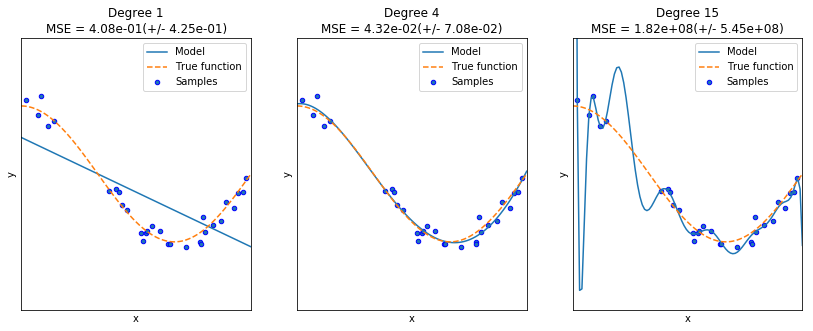

In [59]:
#각 degree별로 시각화 
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

위의 그래프를 참고하면, 점선의 곡선은 실제 데이터셋의 X,y에 대한 cos곡선입니다. 학습데이터는 0~1사이의 30개의 데이터의 x와 y값의 변동에 의해 추가했으며, MSE평가는 학습 데이터를 10개의 교차검증셋으로 나눠 평가했습니다. <br>
- degree1 : underfitting
- degree4 : proper
- degree 15 : overfitting

마지막으로 **Bias-Variance trade off**는 머신러닝이 극복해야할 가장 중요한 이슈 중 하나이다.<br>
일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다. 이를 '전체 오류값'으로 표현하는데, 분산이 서로 trade-off를 이루면서 오류 cost가 최대로 낮아지는 모델을 구축하는 것이 가장 효과적인 머신러닝 모델이다. 

## 05.7. 규제선형모델 - ridge, lasso, elasticnet
최종적으로 비용함수는 **학습데이터의 잔차오류의 값을 최소로 하는 RSS최소화 방법과 과적합을 방지하기 위해 회귀계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 한다**
<br>
여기서 **L2규제**는 $w^2$에 패널티를 부여하여, a가 커지면 비용함수에서는 w를 0에 가깝게 하는 형식으로 변형해야 한다.**L1규제**는 W의 절댓값에 패널티를 부여하여 영향력이 크지 않은 회귀계수는 삭제한다. 

#### 05.1. 릿지회귀

ridge클래스의 주요 생성 파라미터는 alpha이며, 릿지 회귀의 alpha L2규제 계수에 해당한다.

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지회귀 수향(릿지회귀 계수)
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


ridge회귀계수의 a를 변화시키면서 ridge를 적용하는 방법

In [64]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


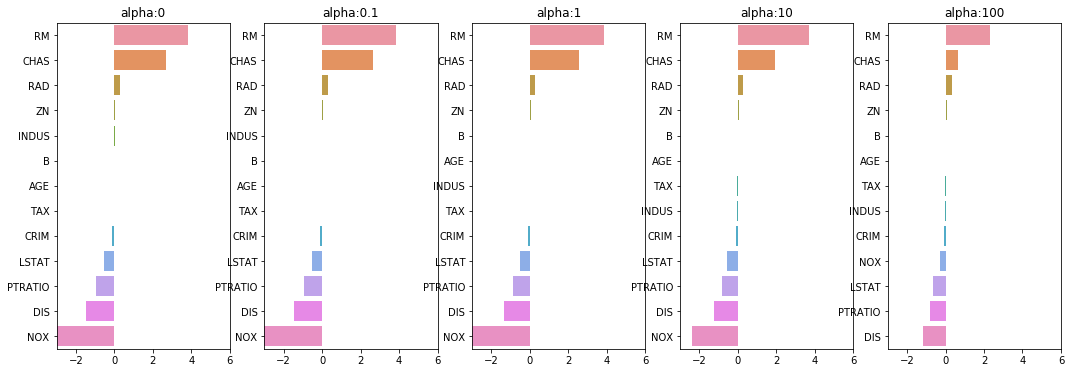

In [67]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [70]:
#데이터프레임에 저장된 alpha값을 계속 증가시킴에 따라 회귀계수가 크게 작아짐을 확인
ridge_alphas = [0 , 0.1, 1 , 10, 100]
sort_columns = 'alpha:'+str(ridge_alphas[0]) #열6이름
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


계속 a의 값은 작아지나 0이 되지는 않는다. <br>
### 라쏘회귀
라쏘는 **W의 절댓값에 패널티를 부여하는 L1규제**를 선형회귀에 적용한 것이다. 즉 라쏘회귀의 비용함수의 목표는 RSS(W)+$||W||_1$을 최소화하는 W를 찾는 것이다. <br>
**L2규제에서는 회귀계수의 크기를 감소시키는데 반해, L1규제는 규제에 불필요한 feature의 계수를 0으로 만든다**<br>
그런면에 있어 L1규제는 적절한 피처만 회귀에 포함하는 피처선택의 특성을 가진다. 

In [82]:
#Lasso의 alpha값을 변화하면서 RMSE와 계수를 출력하기위해
#a에 따른 계수의 변화와 성능을 알아보기 위한 함수를 만든다. 
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 fold평균 RMSE를 출력하고, 계수값을 df로 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True ):
    coeff_df=pd.DataFrame()
    for param in params:
        #모델 선택
        if model_name=='Ridge' : model =Ridge(alpha=param)
        elif model_name=="Lasso" : model=Lasso(alpha=param)
        elif model_name=="ElasticNet" : model =ElasticNet(alpha=param)
            
        #모델 평가
        neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        #회귀계수를 출력하기 위함
        model.fit(X_data, y_target)
        #alpha에 따른 feaure별 회귀계수를 변환하고 df화
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [83]:
#라쏘에 사용될 alpha파라미터 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [84]:
#각 feature별 회귀계수 확인
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


$\alpha$의 크기가 증가하면서 일부 feature의 회귀계수는 0이 되고 있다. NOX속성은 a가 작아도 0이 된다. 즉 회귀계수가 0인 feature는 회귀식에서 제외되면서 feature selection의 효과를 볼 수가 있다. 

### 엘라스틱넷 회귀
Elasticnet regression은 L2규제와 L1규제를 결합한 회귀입니다. 따라서 **엘라스틱넷회귀의 비용함수의 목표는 $RSS(W)+alpha2*(||W||_2)^2+alpha1*||W||_1$의 식을 최소화하는 W를 찾는 것입니다.** 이는 Lasso에서의 문제점을 해결했다. lasso는 a에 따라 특정 feaure의 값을 0으로 보내는데 이를 통해 회귀계수의 값이 크게 변한다, 이를 방지하기 위해 L2를 결합한 것. <br>
**hyperparameter는 alpha와 l1_rato이다.** alpha는 (a+b)로 정의하며, l1_ratio=a/(a+b)로 정의한다. 

In [85]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정(a에 따른 변화를 보고자 하므로 )
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.503 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.478 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.413 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.522 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.954 


In [86]:
#계수 확인
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
B,0.010035,0.009963,0.008997,0.008339,0.007271
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000


### 선형회귀 모델을 위한 데이터의 변환
선형모델은 일반적으로 선형의 관계가 있다고 가정하며, 회귀 모델을 feature값과 타깃값의 분포가 정규분포를 따르면 좋다.<br>
<feature데이터 셋에 적용하는 경우><br>
1. StandardScaler(), MinMaxScaler() -> 예측성능향상기대 어려움
2. scaling결과를 다시 다항특성을 적용하여 함수 fit ->overfitting
3. log변환 <br>

<target값><br>
- log 변환

In [93]:
#method는 standard, MinMax, Log결정
#p_degree다항식 특성을 추가할 때 적용
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    #다항변환
    if p_degree != None : 
        scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

ImportError: cannot import name 'PolynomialScaler' from 'sklearn.preprocessing' (C:\Users\user\.conda\envs\NLPApps\lib\site-packages\sklearn\preprocessing\__init__.py)

In [94]:
#각 alpha를 다르게 하면서 데이터성능지표를 다르게 하고 평가하여 출력한다. 
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE
alphas=[0.1,1,10,100]
#데이터 변환의 경우의 수 모두 적용
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

일반적으로 선형회귀를 적용하려는 데이터셋에 분포가 심각하게 왜곡된 경우에 로그변환을 적용하는 것은 좋은 방법이다 

### 05.7. 로지스틱 회귀
로지스틱회귀는 **선형회귀 방식을 분류에 적용**한 알고리즘. 회귀가 선형이냐 비선형이냐의 여부는 독립변수가 아니라, 가중지($\theta$)가 선형인지를 따른다 따라서 로지스틱은 선형회귀를 기반으로 하되 시그모이드함수에 의해 분류를 실행하는 함수이다.<br>
따라서 로지스틱에도 L1, L2의 규제가 적용이 가능하고 하이퍼파라미터로 조정한다  

In [96]:
#데이터셋로드
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


sklearn 내의 logistic의 주요 하이퍼파라미터로는 penalty와 C가 있다.
- penalty : 규제의 유형을 설정(default = l2)
- C : 규제의 강도를 조절하는 a의 역수 

In [100]:
import warnings
warnings.filterwarnings('ignore')
#하이퍼파라미터 조정(penalty와 C)
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975
